In [2]:
import pandas as pd
import numpy as np

In [3]:
from WorkforceSentimentMonitoring.data import get_data, merge
from WorkforceSentimentMonitoring.data import get_prepaired_data

In [4]:
# get the dataframe
submission, train, test = get_data()
df = merge(submission, train, test)

In [5]:
df

,summary,positives,negatives,advice_to_mgmt,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall,review
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4,5,5,4,5,5,Best Company to work forPeople are smart and f...
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,5,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,4,5,5,4,5,Great balance between big-company security and...
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,4,The best place I've worked and also the most d...
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,4,Execellent for engineersImpact driven. Best te...
...,...,...,...,...,...,...,...,...,...,...,...
29267,great place to grow!,Great health benefits. Many internal job oppor...,Red Tape. Tough to negotiate internal politics...,NaN,4,4,5,4,4,4,great place to grow!Great health benefits. Man...
29268,An ocean of opportunities,diverse set of people and problems they solve....,sometimes feels like a behemoth trying to get ...,align workgroups and incentives better to crea...,1,3,5,4,2,2,An ocean of opportunitiesdiverse set of people...
29269,Tech Gaint,Equip its employees wid huge salaries :D,High qualification required to join it,Good Going....try searching new and bigger tal...,3,3,3,3,3,3,Tech GaintEquip its employees wid huge salarie...
29270,Terrible,They had great health benefits (no longer im t...,* 14 hour days * no idea how to run a service ...,Learn to excel (no pun intended) and ignore mo...,1,1,1,3,1,1,TerribleThey had great health benefits (no lon...


In [6]:
X_train, X_test, y_train, y_test = get_prepaired_data()

Reading data...
Merging data into a single DataFrame...


  0%|          | 0/10 [00:00<?, ?it/s]

Dropping initial text columns...
Identifying entries in other languages...


100%|██████████| 10/10 [04:00<00:00, 24.05s/it]


Drop 438 entries? [y] / n
y
Dropping 438 entries...
Splitting train and test...
Encoding targets...
Done!


In [81]:
predictions = pd.concat([y_train, y_test])

In [9]:
predictions.to_csv('/Users/celinegianduzzo/code/theresa-sporn/WorkforceSentimentMonitoring/raw_data/predictions.csv')

In [83]:
# df_2 binary classification
df_2 = predictions
df_2

,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall
0,1,1,0,1,0,1
1,0,0,1,1,0,1
2,1,1,1,1,0,0
3,0,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
15709,1,1,1,1,0,0
15710,1,1,1,1,1,1
15711,0,0,0,0,0,0
15712,1,1,1,1,1,1


In [85]:
# get the dataframe (predictions of 3 classes: positive, negative, neutral)
submission, train, test = get_data()
df = merge(submission, train, test)

columns = ['work-balance', 'culture-values', 'career-opportunities','comp-benefits', 'senior-mgmt', 'overall']
topics = ['work-balance', 'culture-values', 'career-opportunities','comp-benefits', 'senior-mgmt']
df = df[columns]
df

,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall
0,4,5,5,4,5,5
1,2,3,3,5,3,5
2,5,4,5,5,4,5
3,2,5,5,4,5,4
4,5,5,5,5,5,4
...,...,...,...,...,...,...
29267,4,4,5,4,4,4
29268,1,3,5,4,2,2
29269,3,3,3,3,3,3
29270,1,1,1,3,1,1


In [86]:
df_2 = df_2[columns]
df_2

,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall
0,1,1,0,1,0,1
1,0,0,1,1,0,1
2,1,1,1,1,0,0
3,0,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
15709,1,1,1,1,0,0
15710,1,1,1,1,1,1
15711,0,0,0,0,0,0
15712,1,1,1,1,1,1


In [111]:
categories = ['overall', 'work-balance', 'culture-values', 'career-opportunities','comp-benefits', 'senior-mgmt']
topics = ['work-balance', 'culture-values', 'career-opportunities','comp-benefits', 'senior-mgmt']
df= df.reindex(columns=categories)

# 2 class prediction
df_2 = df_2.reindex(columns=categories)

In [36]:
pos_counts = df[df>=4].count()
neg_counts = df[df<=2].count()
neutral_counts = df[df==3].count()

counts = ['positive', 'negative', 'neutral']

In [44]:
neutral counts

overall                 26969
work-balance            26163
culture-values          34475
career-opportunities    31669
comp-benefits           37708
senior-mgmt             26415
dtype: int64

In [49]:
pos_counts_2 = df_2[df_2==1].count()
neg_counts_2 = df_2[df_2==0].count()
neutral_counts_2 = df_2[df_2==2].count()


counts_2 = ['positive', 'negative', 'neutral']

In [89]:
df_counts = pd.DataFrame([pos_counts, neg_counts, neutral_counts], index=counts)
df_counts

,overall,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt
positive,26969,26163,34475,31669,37708,26415
negative,10963,13936,9353,9414,4928,14091
neutral,14883,12716,8987,11732,10179,12309


In [90]:
df_counts_2 = pd.DataFrame([pos_counts_2, neg_counts_2, neutral_counts_2], index=counts_2)
df_counts_2

,overall,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt
positive,26747,25930,34169,31413,37414,26179
negative,25630,26447,18208,20964,14963,26198
neutral,0,0,0,0,0,0


In [91]:
total_counts = df.shape[0]
total_counts_2 = df_2.shape[0]

In [92]:
for category in categories:
    df_counts[f'{category}_counts'] = (df_counts[f'{category}']/total_counts)

df_counts

,overall,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall_counts,work-balance_counts,culture-values_counts,career-opportunities_counts,comp-benefits_counts,senior-mgmt_counts
positive,26969,26163,34475,31669,37708,26415,0.510631,0.495371,0.65275,0.599621,0.713964,0.500142
negative,10963,13936,9353,9414,4928,14091,0.207574,0.263864,0.17709,0.178245,0.093307,0.266799
neutral,14883,12716,8987,11732,10179,12309,0.281795,0.240765,0.17016,0.222134,0.192729,0.233059


In [95]:
for category in categories:
    df_counts_2[f'{category}_counts'] = (df_counts_2[f'{category}']/total_counts_2)

df_counts_2 = df_counts_2.iloc[:2]
df_counts_2

,overall,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall_counts,work-balance_counts,culture-values_counts,career-opportunities_counts,comp-benefits_counts,senior-mgmt_counts
positive,26747,25930,34169,31413,37414,26179,0.510663,0.495065,0.652366,0.599748,0.714321,0.499819
negative,25630,26447,18208,20964,14963,26198,0.489337,0.504935,0.347634,0.400252,0.285679,0.500181


In [144]:
df_new = pd.DataFrame()
for category in categories:
    df_new[f'{category}'] = df_counts[f'{category}']
df_trans = df_new.transpose()
#df_trans = df_trans.drop(df_trans.index[-1])

In [145]:
df_trans.negative = (df_trans.negative/df_trans.negative.sum())*100
df_trans.positive = (df_trans.positive/df_trans.positive.sum())*100
df_trans.neutral = (df_trans.neutral/df_trans.neutral.sum())*100
df_trans

,positive,negative,neutral
overall,14.705097,17.489032,21.019405
work-balance,14.265618,22.231794,17.958930
culture-values,18.797812,14.920635,12.692427
career-opportunities,17.267815,15.017947,16.569217
comp-benefits,20.560636,7.861530,14.375900
senior-mgmt,14.403023,22.479062,17.384120


In [151]:
df_new = pd.DataFrame()
for category in categories:
    df_new[f'{category}'] = df_counts_2[f'{category}']
df_trans_2 = df_new.transpose()

In [152]:
df_trans_2.negative = (df_trans_2.negative/df_trans_2.negative.sum())*100
df_trans_2.positive = (df_trans_2.positive/df_trans_2.positive.sum())*100
#df_trans.neutral = (df_trans.neutral/df_trans.neutral.sum())*100
df_trans_2

,positive,negative
overall,14.708114,19.356544
work-balance,14.258848,19.973567
culture-values,18.789455,13.751227
career-opportunities,17.273937,15.832641
comp-benefits,20.573873,11.300506
senior-mgmt,14.395772,19.785515


In [103]:
overall_counts = list(df_counts.overall_counts)
max(overall_counts)

index_max = np.argmax(overall_counts)
index_max

0

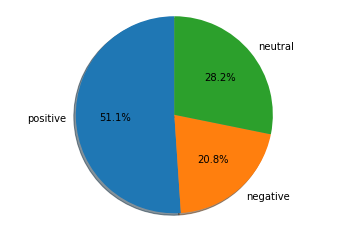

In [102]:
import matplotlib.pyplot as plt

labels = ['positive', 'negative', 'neutral']
sizes = list(df_counts.overall_counts)
#explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
#st.pyplot(fig1)

In [104]:
import plotly.graph_objects as go

figures = []

for category in categories:
    
    labels = ['positive', 'negative', 'neutral']
    values = list(df_counts[f'{category}'])
    print(values)
    marker = {'colors': [
                     '#e6f2ff',
                     '#99ccff',
                     '#ccccff',
                    ]}
    #print(values)
    index_max = np.argmax(values)
    #print(index_max)
    pull = [0,0,0]
    pull[index_max] = 0.2
    #print(pull)
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=pull, textinfo='label+percent', title=f'{category}', marker = marker)])
    #fig.show()
    figures.append(fig)
    if index_max == 0:
        print('positive')
    elif index_max == 1:
        print('negative')
    else: print('neutral')

[26969, 10963, 14883]
positive
[26163, 13936, 12716]
positive
[34475, 9353, 8987]
positive
[31669, 9414, 11732]
positive
[37708, 4928, 10179]
positive
[26415, 14091, 12309]
positive


In [105]:
figures[0].show()

In [106]:
figures = []

for category in categories:
    
    labels = ['positive', 'negative', 'neutral']
    values = list(df_counts_2[f'{category}'])
    print(values)
    marker = {'colors': [
                     '#e6f2ff',
                     '#99ccff',
                     '#ccccff',
                    ]}
    #print(values)
    index_max = np.argmax(values)
    #print(index_max)
    pull = [0,0,0]
    pull[index_max] = 0.2
    #print(pull)
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=pull, textinfo='label+percent', title=f'{category}', marker = marker)])
    #fig.show()
    figures.append(fig)
    if index_max == 0:
        print('positive')
    elif index_max == 1:
        print('negative')
    else: print('neutral')

[26747, 25630]
positive
[25930, 26447]
negative
[34169, 18208]
positive
[31413, 20964]
positive
[37414, 14963]
positive
[26179, 26198]
negative


In [77]:
figures[0].show()

In [146]:
df_trans[['negative']].iloc[1:].negative

work-balance            22.231794
culture-values          14.920635
career-opportunities    15.017947
comp-benefits            7.861530
senior-mgmt             22.479062
Name: negative, dtype: float64

In [126]:
df_trans_2

,positive,negative
overall,14.708114,19.356544
work-balance,14.258848,19.973567
culture-values,18.789455,13.751227
career-opportunities,17.273937,15.832641
comp-benefits,20.573873,11.300506
senior-mgmt,14.395772,19.785515


In [118]:
topics

['work-balance',
 'culture-values',
 'career-opportunities',
 'comp-benefits',
 'senior-mgmt']

<BarContainer object of 5 artists>

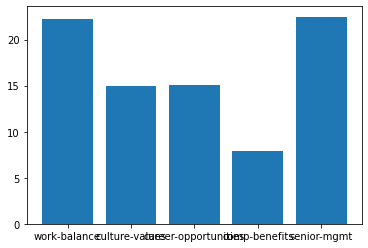

In [122]:
plt.bar(topics, df_trans[['negative']].iloc[1:].negative)

In [147]:
df_trans.reset_index(inplace=True)
df_trans.rename(columns = {'index':'review topics','negative':'percentage [%]'}, inplace=True)
df_trans = df_trans.drop(0)

,review topics,positive,percentage [%],neutral
1,work-balance,14.265618,22.231794,17.958930
2,culture-values,18.797812,14.920635,12.692427
3,career-opportunities,17.267815,15.017947,16.569217
4,comp-benefits,20.560636,7.861530,14.375900
5,senior-mgmt,14.403023,22.479062,17.384120


In [153]:
df_trans_2.reset_index(inplace=True)
df_trans_2.rename(columns = {'index':'review topics','negative':'percentage [%]'}, inplace=True)
df_trans_2

,review topics,positive,percentage [%]
0,overall,14.708114,19.356544
1,work-balance,14.258848,19.973567
2,culture-values,18.789455,13.751227
3,career-opportunities,17.273937,15.832641
4,comp-benefits,20.573873,11.300506
5,senior-mgmt,14.395772,19.785515


In [156]:
df_trans_2 = df_trans_2.drop(0)

In [155]:
import plotly.express as px

color = '#ff0000'

fig = px.bar(df_trans, x='review topics', y='percentage [%]', title="Negative Reviews")
fig.update_traces(marker_color='rgb(158,202,225)')
fig.show()

In [157]:
import plotly.express as px

color = '#ff0000'

fig = px.bar(df_trans_2, x='review topics', y='percentage [%]', title="Negative Reviews")
fig.update_traces(marker_color='rgb(158,202,225)')
fig.show()